In [1]:
#### For Linear Algebra
import numpy as np
#### For Data Processing/manipulation
import pandas as pd
#### For Data visualization
import seaborn as se
import matplotlib.pyplot as mlt

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
labels=train["SalePrice"]
test = pd.read_csv('test.csv')
data = pd.concat([train,test],ignore_index=True)
data = data.drop("SalePrice", 1)
ids = test["Id"]
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
print(((data["LotFrontage"].isnull().sum())/len(data))*100)
print(((data["MasVnrType"].isnull().sum())/len(data))*100)
print(((data["MasVnrArea"].isnull().sum())/len(data))*100)
print(((data["Electrical"].isnull().sum())/len(data))*100)

16.649537512846866
0.8221993833504625
0.7879410757108599
0.0342583076396026


In [5]:
data["LotFrontage"].fillna(value=data["LotFrontage"].mean(),inplace=True)
data["Alley"].fillna(value="No alley access",inplace=True)
data["MasVnrType"].replace(to_replace="None",value="no",inplace=True)
data["MasVnrArea"].fillna(value=data["MasVnrArea"].mean(),inplace=True)
data["BsmtQual"].fillna(value="No Basement",inplace=True) ### NA replaced By No Basement
data["BsmtCond"].fillna(value="No Basement",inplace=True) ### NA replaced By No Basement
data["BsmtExposure"].fillna(value="No Basement",inplace=True) ### NA replaced By No Basement
data["BsmtFinType1"].fillna(value="No Basement",inplace=True) ### NA replaced By No Basement
data["BsmtFinType2"].fillna(value="No Basement",inplace=True) ### NA replaced By No Basement
data["FireplaceQu"].fillna(value="No Fireplace",inplace=True) #### NA replaced With No Fireplace
data["GarageType"].fillna(value="No Garage",inplace=True) #### NA replaced With No Garage
data["GarageYrBlt"].fillna(value=0,inplace=True) #### NA replaced With 0 where no Garage is present
data["GarageFinish"].fillna(value="No Garage",inplace=True) #### NA replaced With No Garage
data["GarageQual"].fillna(value="No Garage",inplace=True) #### NA replaced With No Garage
data["GarageCond"].fillna(value="No Garage",inplace=True) #### NA replaced With No Garage
data["PoolQC"].fillna(value="No Pool",inplace=True) #### NA replaced With No Pool
data["Fence"].fillna(value="No Fence",inplace=True) #### NA replaced With No Fence
data["MiscFeature"].fillna(value="None",inplace=True) #### NA replaced With None
data.drop("Id",inplace=True,axis=1)

LotFrontage: 16.64% Data Empty Replaced by mean

Alley: NA Replaced By No alley access

MasVnrType: 0.82% Empty Data, none replaced by NO

MasVnrArea:0.78% Empty Data, Null Values Replaced by Mean

BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1BsmtFinType2: NA replaced By No Basement

Electrical: 0.034% Empty Data

FireplaceQu: NA replaced With No Fireplace

GarageType:NA replaced With No Fireplace

GarageYrBlt: NA replaced With 0 where no Garage is present

GarageFinish,GarageQual,GarageCond: NA replaced With No Garage

PoolQC: NA replaced With No Pool

Fence: NA replaced With No Fence

MiscFeature: NA replaced With None

In [6]:
nans=pd.isnull(data).sum()
print(nans[nans>0])

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      24
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Electrical       1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageCars       1
GarageArea       1
SaleType         1
dtype: int64


In [7]:
data = pd.get_dummies(data)
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
data = imputer.fit_transform(data)

In [9]:
data

array([[6.0000e+01, 6.5000e+01, 8.4500e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 8.0000e+01, 9.6000e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.0000e+01, 6.8000e+01, 1.1250e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+01, 1.6000e+02, 2.0000e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.5000e+01, 6.2000e+01, 1.0441e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.0000e+01, 7.4000e+01, 9.6270e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_s = scaler.fit_transform(data)
data_s

array([[ 0.06733141, -0.20206753, -0.21787869, ..., -0.12653513,
         0.46393674, -0.30269297],
       [-0.87361603,  0.50187048, -0.07204408, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.06733141, -0.06127993,  0.13719688, ..., -0.12653513,
         0.46393674, -0.30269297],
       ...,
       [-0.87361603,  4.25620653,  1.24680804, ..., -0.12653513,
        -2.15546626, -0.30269297],
       [ 0.65542357, -0.34285513,  0.0346054 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.06733141,  0.22029527, -0.06862014, ..., -0.12653513,
         0.46393674, -0.30269297]])

In [11]:
data = np.log(data)
labels = np.log(labels)
data[data==-np.inf]=0
data

array([[4.09434456, 4.17438727, 9.04192172, ..., 0.        , 0.        ,
        0.        ],
       [2.99573227, 4.38202663, 9.16951838, ..., 0.        , 0.        ,
        0.        ],
       [4.09434456, 4.21950771, 9.32812341, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.99573227, 5.07517382, 9.90348755, ..., 0.        , 0.        ,
        0.        ],
       [4.44265126, 4.12713439, 9.25349564, ..., 0.        , 0.        ,
        0.        ],
       [4.09434456, 4.30406509, 9.17232693, ..., 0.        , 0.        ,
        0.        ]])

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
data

array([[4.09434456, 4.17438727, 9.04192172, ..., 0.        , 0.        ,
        0.        ],
       [2.99573227, 4.38202663, 9.16951838, ..., 0.        , 0.        ,
        0.        ],
       [4.09434456, 4.21950771, 9.32812341, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.99573227, 5.07517382, 9.90348755, ..., 0.        , 0.        ,
        0.        ],
       [4.44265126, 4.12713439, 9.25349564, ..., 0.        , 0.        ,
        0.        ],
       [4.09434456, 4.30406509, 9.17232693, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21486316, 0.38884791, 0.50493977, 0.60031484, 0.67376012,
       0.74075698, 0.80117873, 0.85002605, 0.89194343, 0.92502205,
       0.95000439, 0.95902526, 0.96683921, 0.97390568, 0.97953153,
       0.98458679, 0.98889565, 0.99157989, 0.99351013, 0.99507947,
       0.99598074, 0.99680697, 0.99751954, 0.99819697, 0.99868806,
       0.99907247, 0.99937726, 0.99962131, 0.9997944 , 0.99988867,
       0.99994403, 0.99998779, 0.99999786, 0.99999933, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

## explained_variance_ratio_
Yes, you are nearly right. The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension. Thus pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.

You probably want to do pca.explained_variance_ratio_.cumsum(). That will return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

## Till 36th value 100% Of data is Explained.

In [14]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(data)
dataPCA = pca.transform(data)
dataPCA

array([[ 0.18366022, -1.28366795,  0.71105409, ..., -0.54098355,
         0.19418797, -0.08098779],
       [-0.9937118 ,  0.32234673,  0.3115235 , ...,  0.87153755,
        -1.28423768, -0.68286881],
       [ 0.28863411, -1.23284397,  0.53419474, ..., -0.68059211,
         0.26046916,  0.23791878],
       ...,
       [-1.23952463,  0.39882881,  1.0764209 , ..., -0.25687375,
         1.27979276, -1.24232584],
       [-0.36706089,  1.03064036,  0.17439616, ..., -1.80475255,
        -0.59061571, -1.34478771],
       [ 0.02727284, -1.88496319,  0.44644596, ...,  0.57846147,
        -0.16299171, -1.14972477]])

#### The Regressor's Imported

In [15]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [16]:
def lets_try(train,labels):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
        
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)

    clf = linear_model.Ridge()
    results["Ridge"] = test_model(clf)

    clf = linear_model.HuberRegressor()
    results["Huber_rrgessor"] = test_model(clf)

    clf = linear_model.Lasso()
    results["Lasso"] = test_model(clf)

    clf = AdaBoostRegressor()
    results["AdaBoost_Regressor"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results.plot(kind="bar",title="Model Scores")
    axes = mlt.gca()
    axes.set_ylim([0.5,1])
    mlt.show()
    return results

In [17]:
train = dataPCA[:1460]
test = dataPCA[1460:]

## After Applying PCA

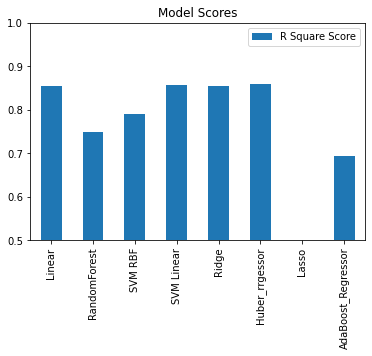

,R Square Score
Linear,0.853983
RandomForest,0.748637
SVM RBF,0.790980
SVM Linear,0.857594
Ridge,0.854018
Huber_rrgessor,0.859544
Lasso,-0.001187
AdaBoost_Regressor,0.692148


In [18]:
lets_try(train,labels)

## Before PCA

In [19]:
train = data[:1460]
test = data[1460:]

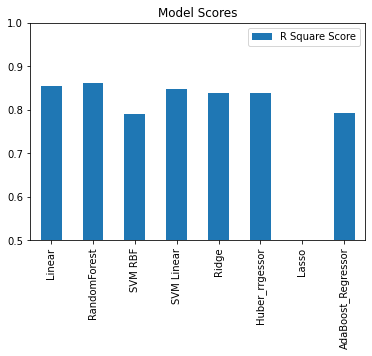

,R Square Score
Linear,0.853983
RandomForest,0.861969
SVM RBF,0.788773
SVM Linear,0.847880
Ridge,0.837381
Huber_rrgessor,0.837076
Lasso,-0.001187
AdaBoost_Regressor,0.793107


In [20]:
lets_try(train,labels)